<a href="https://colab.research.google.com/github/aalr007/iayaa-Equipo-19/blob/main/MNA_IAyAA_semana_6_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

* Aurelio Antonio Lozano Rabago A01081266
* Josias Ruiz Peña A00968460  
* David González A01794025
* Jerson David Pérez Contreras A01793810
* Jose Alberto Mtanous Treviño A00169781


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [112]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import os
import numpy as np
import pandas as pd
import seaborn as sns 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,classification_report, make_scorer

#importando para ejercicio 3
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#librerias para ejercicio4 modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold


from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve

import matplotlib.pyplot as plt



#**Ejercicio-1.** 

In [113]:
# Cargamos el archivo que está en la siguiente carpeta de Google-Colab:
DIR = "/content/sample_data/"
os.chdir(DIR)

misdatos = pd.read_csv("SouthGermanCredit.asc", sep=" ")
misdatos.describe()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [114]:
#renombramos las columnas
misdatos.rename(columns={
    'laufkont':'status',
    'laufzeit':'duration',
    'moral':'credit_history',
    'verw':'purpose',
    'hoehe':'amount',
    'sparkont':'savings',
    'beszeit':'employment_duration',
    'rate':'installment_rate',
    'famges':'personal_status_sex',
    'buerge':'other_debtors',
    'wohnzeit':'present_residence',
    'verm':'property',
    'alter':'age',
    'weitkred':'other_installment_plans',
    'wohn':'housing',
    'bishkred':'number_credits',
    'beruf':'job',
    'pers':'people_liable',
    'telef':'telephone',
    'gastarb':'foreign_worker',
    'kredit':'credit_risk',
},inplace=True)
misdatos.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


#**Ejercicio-2.**

In [115]:
X = misdatos.loc[:,["status","duration","credit_history","purpose","amount","savings","employment_duration","installment_rate",	"personal_status_sex",	"other_debtors","present_residence",	"property",	"age",	"other_installment_plans",	"housing",	"number_credits"	,"job",	"people_liable"	,"telephone",	"foreign_worker"]]
y = misdatos.loc[:,'credit_risk']

#Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 15%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=10)



#**Ejercicio-3.**

In [116]:
df_CategoricalVar = ['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing']
df_CuantitativaDiscVar= ["employment_duration","installment_rate","present_residence","property","number_credits","job"]
df_NumericVar= ["duration","amount","age"]
df_BinaryVar= ["people_liable","telephone","foreign_worker"]

In [117]:
X_train.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
dtype: int64

In [118]:
X_train.isna().any()

status                     False
duration                   False
credit_history             False
purpose                    False
amount                     False
savings                    False
employment_duration        False
installment_rate           False
personal_status_sex        False
other_debtors              False
present_residence          False
property                   False
age                        False
other_installment_plans    False
housing                    False
number_credits             False
job                        False
people_liable              False
telephone                  False
foreign_worker             False
dtype: bool

In [119]:
X_train.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,2.595294,20.462353,2.527059,2.851765,3216.104706,2.121176,3.384706,2.981176,2.690588,1.155294,2.852941,2.34000,35.603529,2.663529,1.924706,1.402353,2.900000,1.848235,1.403529,1.963529
std,1.260425,11.726531,1.077600,2.762129,2748.335186,1.590060,1.228442,1.114049,0.714666,0.491987,1.102849,1.04928,11.464257,0.716431,0.524074,0.570573,0.651627,0.359004,0.490894,0.187568
min,1.000000,4.000000,0.000000,0.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,2.000000,1.000000,1374.000000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.00000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,2.000000,18.000000,2.000000,2.000000,2301.500000,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.00000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,4.000000,24.000000,4.000000,3.000000,3959.000000,3.000000,5.000000,4.000000,3.000000,1.000000,4.000000,3.00000,42.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,4.000000,72.000000,4.000000,10.000000,15945.000000,5.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.00000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [120]:
#trabajamos las imputaciones
#pipeline variables Numericas
df_PipelineNum= Pipeline(steps = [('ImpMediana', SimpleImputer(strategy='median')), ('scalar', MinMaxScaler(feature_range=(1,2)))])
columnas_PipelineNum =df_NumericVar

#pipeline variables categoricas
df_PipelineCate = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(handle_unknown="ignore"))])
columnas_df_PipelineCate = df_CategoricalVar


#pipeline variables binarias
df_PipelineBin = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(handle_unknown="ignore"))])
columnas_df_PipelineBin = df_BinaryVar


#realizamos la transformacion con los pipelines anteriores a las columnas adecuadas
df_ColTransformadas = ColumnTransformer(transformers=[('Numericas', df_PipelineNum, columnas_PipelineNum), 
                                            ('Categoricas', df_PipelineCate , columnas_df_PipelineCate), 
                                            ('binarias', df_PipelineBin, columnas_df_PipelineBin)], 
                                            remainder='passthrough')



#**Ejercicio-4.**

In [121]:
#reusamos las metricas recall, f1, gmean.
def mi_recall(yreal, ypred):
  Vn, Fp, Fn, Vp = confusion_matrix(yreal, ypred).ravel()
  recall = Vp/(Vp+Fn)
  return recall

def mi_f1score(yreal, ypred):
  Vn, Fp, Fn, Vp = confusion_matrix(yreal, ypred).ravel()
  f1score = (2*Vp)/((2*Vp)+Fp+Fn)
  return f1score

def mi_gmean(yreal, ypred):
  Vn, Fp, Fn, Vp= confusion_matrix(yreal,ypred).ravel()
  recall = mi_recall(yreal, ypred)
  especificidad= Vn / (Vn+Fp)
  gmean = np.sqrt(recall*especificidad)
  #En caso de querer comprobar que el gmean tenga buen resultado, usamos la funcion de sklearn
  #PEgar funcion aqui
  return gmean

def mi_accuracy(yreal, ypred):
  Vn, Fp, Fn, Vp = confusion_matrix(yreal, ypred).ravel()
  accuracy = (Vp+Vn)/(Vp+Vn+Fp+Fn)
  return accuracy

def mi_precision(yreal, ypred):
  Vn, Fp, Fn, Vp = confusion_matrix(yreal, ypred).ravel()
  precision = Vp/(Vp+Fp)
  return precision



#creamos la lista de modelos con sus nombres
def Do_models():
  #listas
  modelos = list()
  nombres = list()

  # Modelo de Regresión Logística:
  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('RegresionLog')

  # Modelo de arbol de Decision:
  modelos.append(DecisionTreeClassifier())
  nombres.append('ArbolDecision')
  
  #modelo bosque aleatorio
  modelos.append(RandomForestClassifier())
  nombres.append('BosqueAleatorio')
  
  return modelos, nombres


resultados = list()


In [122]:
#creamos los modelos
modelos, nombres = Do_models()  
modelos


[LogisticRegression(solver='liblinear'),
 DecisionTreeClassifier(),
 RandomForestClassifier()]

In [123]:
for i in range(len(modelos)):

#Kfold validacion cruzada de 5 particiones y 3 repeticiones
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
#en pipeline ponemos las columnas transformadas y los modelos
  pipeline = Pipeline(steps=[('ct',df_ColTransformadas),('m',modelos[i])])

  mis_metricas = {
      "accuracy": make_scorer(mi_accuracy),
      "precision":make_scorer(mi_precision),
      "recall": make_scorer(mi_recall),
      "f1score": make_scorer(mi_f1score),
      "gmean": make_scorer(mi_gmean)
  }

  resultadosOU = cross_validate(pipeline, X_train, y_train, scoring=mis_metricas, cv=kfold, return_train_score=True)
  
  resultados.append(resultadosOU)
  
  print("Prueba \n") 
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_accuracy']), np.std(resultadosOU['test_accuracy']), 
                                                                          np.mean(resultadosOU['test_precision']),np.std(resultadosOU['test_precision']), 
                                                                          np.mean(resultadosOU['test_recall']),np.std(resultadosOU['test_recall']),
                                                                          np.mean(resultadosOU['test_f1score']),np.std(resultadosOU['test_f1score']),
                                                                          np.mean(resultadosOU['test_gmean']),np.std(resultadosOU['test_gmean'])
                                                                          ))
  

  print("Entrenamiento \n") 
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i], 
                                                                          np.mean(resultadosOU['train_accuracy']), np.std(resultadosOU['train_accuracy']),  
                                                                          np.mean(resultadosOU['train_precision']), np.std(resultadosOU['train_precision']), 
                                                                          np.mean(resultadosOU['train_recall']), np.std(resultadosOU['train_recall']),
                                                                          np.mean(resultadosOU['train_f1score']), np.std(resultadosOU['train_f1score']), 
                                                                          np.mean(resultadosOU['train_gmean']), np.std(resultadosOU['train_gmean']) ))



Prueba 

RegresionLog:
mean Accuracy: 0.751 (0.0336)
mean Precision: 0.794 (0.0316)
mean Recall: 0.878 (0.0213)
mean F1score: 0.833 (0.0210)
Gmean: 0.621 (0.0690)

Entrenamiento 

RegresionLog:
mean Accuracy: 0.791 (0.0089)
mean Precision: 0.818 (0.0074)
mean Recall: 0.907 (0.0074)
mean F1score: 0.860 (0.0058)
Gmean: 0.680 (0.0159)

Prueba 

ArbolDecision:
mean Accuracy: 0.677 (0.0391)
mean Precision: 0.774 (0.0264)
mean Recall: 0.770 (0.0525)
mean F1score: 0.771 (0.0323)
Gmean: 0.586 (0.0536)

Entrenamiento 

ArbolDecision:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean F1score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)

Prueba 

BosqueAleatorio:
mean Accuracy: 0.764 (0.0228)
mean Precision: 0.785 (0.0210)
mean Recall: 0.918 (0.0204)
mean F1score: 0.846 (0.0141)
Gmean: 0.595 (0.0534)

Entrenamiento 

BosqueAleatorio:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean F1score: 1.000 (0.0000)
Gmean: 1.0

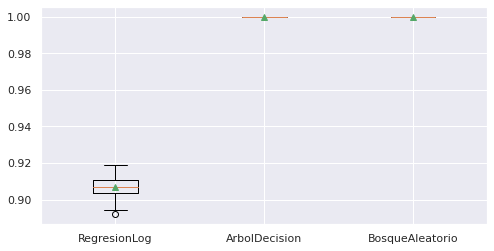

In [124]:
sns.set(rc={'figure.figsize':(8,4)})






bpRecallTrain = list()

for i in range(len(resultados)):
  rr = resultados[i]['train_recall']
  bpRecallTrain.append(rr)

plt.boxplot(bpRecallTrain, labels=nombres, showmeans=True)
plt.show()




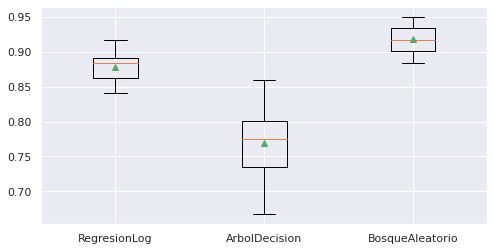

In [125]:
bpRecallTest = list()
for i in range(len(resultados)):
  rr = resultados[i]['test_recall']
  bpRecallTest.append(rr)

plt.boxplot(bpRecallTest, labels=nombres, showmeans=True)
plt.show()

#4d  
¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu 
respuesta. 
El arbol de decisión clasifica sin error en el set de entrenamiento, pero al pasar a prueba su rendimiento cae, por lo que esta sobreentrenado.
El bosque aleatorio, en entrenamiento llega al 100% pero tiene un buen desempeño en pruebas, por lo que no lo consideramos sobreentrenado



In [172]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores, titulo, etiquetaX, etiquetaY):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title(titulo)
    plt.xlabel(etiquetaX)
    plt.ylabel(etiquetaY)
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [127]:
def mi_ModeloYCurvas(Xin):
       # Usemos primeramente el modelo de regresión logística
       # con sus parámetros predeterminados y semilla igual a 1.
       # Incremenetamos además el máximo de iteraciones para 
       # asegurar la convergencia de cada partición de la VC.

       modeloLogReg = LogisticRegression(max_iter=2500, random_state=1) 

       mi_pipe = Pipeline([('escalar',StandardScaler()),('modelo', modeloLogReg)])

       mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

       delta_train_sz = np.linspace(0.1, 1.0, num=40, endpoint=True, retstep=False, dtype=None, axis=0)


       tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe,    
                                                        X = Xin,
                                                        y = y_train,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        random_state=11)


       # Obtenemos el gráfico con las curvas de aprendizaje:
       mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

Curvas de aprendizaje del arbol de decision:


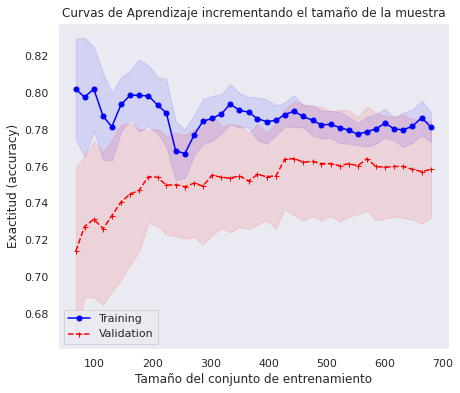

In [128]:
print('Curvas de aprendizaje del arbol de decision:')
mi_ModeloYCurvas(X_train)

In [131]:
def create_validation_curve (x_val,y_val,param_name,cv_entrada,scoring):

  modelo = DecisionTreeClassifier()
  pipe = Pipeline(steps=[("DataPrep",df_ColTransformadas),("model",modelo)])

  rango_param = np.linspace(1, 20, 20,dtype="int")

  t_scores, v_scores = validation_curve(
      estimator=pipe,
      X=x_val, y=y_val, 
      param_name=f"model__{param_name}", 
      param_range=rango_param, cv=cv_entrada,    
      scoring=scoring,
  )

  return rango_param, t_scores, v_scores

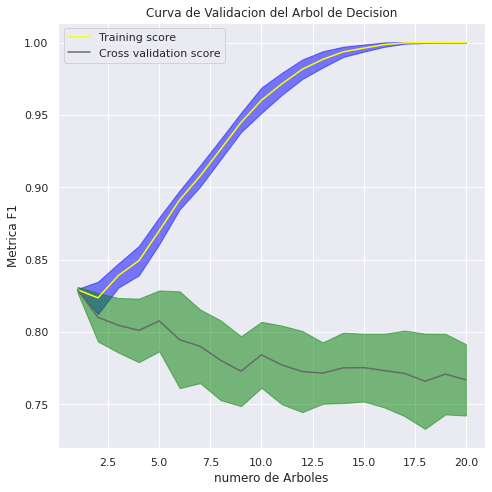

In [134]:
from scipy.stats import alpha
param_range,train_score, validation_score = create_validation_curve(X_train,y_train,"max_depth",kfold,make_scorer(mi_f1score))
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(validation_score, axis=1)
test_std = np.std(validation_score, axis=1)

plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="yellow")
plt.plot(param_range, test_mean, label="Cross validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue",alpha=0.5)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="green",alpha=0.5)
 
plt.title("Curva de Validacion del Arbol de Decision")
plt.xlabel("numero de Arboles")
plt.ylabel("Metrica F1")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [135]:
def mi_RandomFCurve(X_entrada): 

  modeloRndF = RandomForestClassifier() 
  mi_pipe = Pipeline(steps=[("DataPrep", df_ColTransformadas),("ModeloRandomForest", modeloRndF)])
  mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  
  delta_train_sz = np.linspace(.1, 1, 20) 
  tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,    
                                                        X = X_entrada,
                                                        y = y_train,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        random_state=10,
                                                        scoring=make_scorer(mi_recall)) 

  mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores'Incrementando tamaño de muestra', 'tamaño muestra', 'recall') 

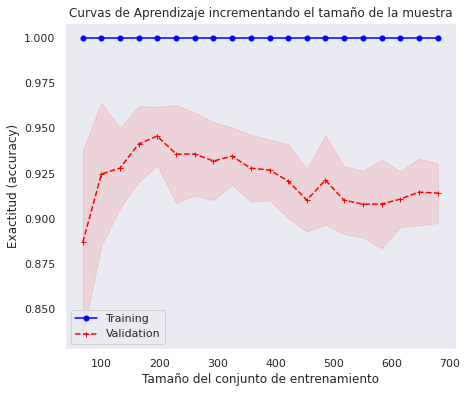

In [136]:
mi_RandomFCurve(X_train)

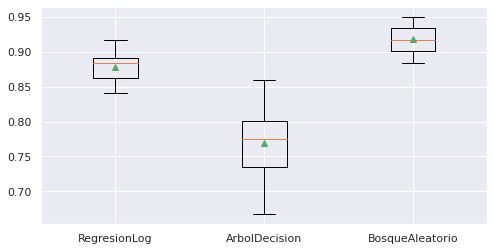

In [137]:
sns.set(rc={'figure.figsize':(8,4)})

recall_list = list()

for i in range(len(resultados)):
  valor = resultados[i]['test_recall']
  recall_list.append(valor)

plt.boxplot(recall_list, labels=nombres, showmeans=True)

plt.show()

#**Ejercicio-5.**

5a

In [141]:
modeloCV = LogisticRegression(max_iter=9000, random_state=1) 
mi_pipeCV = Pipeline(steps=[("DataPrep", df_ColTransformadas),("model", modeloCV)]) 
mi_kfoldCV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  

In [144]:
Params= [0.05, 1, 5, 50, 100, 1000]

ParamsGR = [{'model__penalty': ['l1'], 'model__solver': [ 'saga'], 'model__class_weight':['balanced', None], 'model__C': Params},
                  {'model__penalty': ['l2'], 'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'model__class_weight':['balanced', None], 'model__C': Params},
                  {'model__penalty': ['elasticnet'], 'model__solver': ['saga'], 'model__class_weight':['balanced', None], 'model__C': Params, 'model__l1_ratio': [0.5]},
                 ]

In [145]:
mi_Grid=  GridSearchCV (estimator =  mi_pipeCV, 
                            param_grid = ParamsGR,
                            scoring = 'f1',
                            cv = mi_kfoldCV)

In [146]:
mi_Grid.fit(X_train, np.ravel(y_train))
best_score = mi_Grid.best_score_
best_param = mi_Grid.best_params_

In [147]:
print("Best score:", best_score)
print("Best param:", best_param)

Best score: 0.8444809363947833
Best param: {'model__C': 0.05, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'sag'}


¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones. 

hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad, con la finalidad que el modelo sea balanceado con los falsos positivos y negativos.
El valor máximo del score F1 es 1, y esto indicaría una exhaustividad (recall) y precisión perfecta, por otro lado el valor más pequeño que puede tomar el score es 0 cuando la precisión y el recall también son 0.

5B

In [148]:
def PlotCV (X_entrada, parametro_C, penalizacion, resolutor):
  
  modeloCV = LogisticRegression(C=parametro_C, solver=resolutor, penalty=penalizacion, max_iter=8000, random_state=1)
  pipe_CV = Pipeline(steps=[("DataPrep", df_ColTransformadas),("RegresionLogistica", modeloCV)])
  kfold_CV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)
  train_size_CV = np.linspace(0.1, 1.0, 20) 
  tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipe_CV ,    
                                                        X = X_entrada,
                                                        y = y_train,
                                                        cv = kfold_CV ,
                                                        train_sizes = train_size_CV ,
                                                        random_state=10,
                                                        scoring=make_scorer(mi_f1score))

  mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

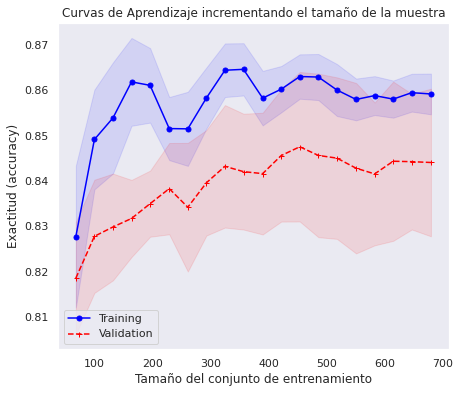

In [149]:
PlotCV(X_train, 0.1,'l2','saga')

5C

In [165]:
modeloCV = DecisionTreeClassifier() 
mi_pipeCV = Pipeline(steps=[("DataPrep", df_ColTransformadas),("model", modeloCV)]) 
mi_kfoldCV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  

ParametroGR = {'model__ccp_alpha':[0.01, 0.001, .0001, .00001],  
              'model__criterion': ['gini', 'entropy'], 
              'model__max_depth':[2, 4, 6, 8, 10, 12], 
              'model__min_samples_split':[2, 4, 6,8,10],
              'model__class_weight': ['balanced', None]}

ModeloArbolD=  GridSearchCV (estimator =  mi_pipeCV, 
                            param_grid = ParametroGR,
                            scoring = make_scorer(mi_precision), 
                            cv = mi_kfoldCV)
ModeloArbolD.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=7),
             estimator=Pipeline(steps=[('DataPrep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Numericas',
                                                                         Pipeline(steps=[('ImpMediana',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scalar',
                                                                                          MinMaxScaler(feature_range=(1,
                                                                                                                      2)))]),
                                                                         ['duration',
                                   

Cuál es la utilidad de la métrica “precision”? Incluye tus conclusiones. 
VP/VP+FP
nos ayuda a entender como el modelo esta detectando los verdaderos positivos, buscando reducir los Falsos Positivos.

In [166]:
BestScore = ModeloArbolD.best_score_
BestParam = ModeloArbolD.best_params_
print("Best Score:", best_score)
print("Best Param:", best_param)

Best Score: 0.8444809363947833
Best Param: {'model__C': 0.05, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'sag'}


5D

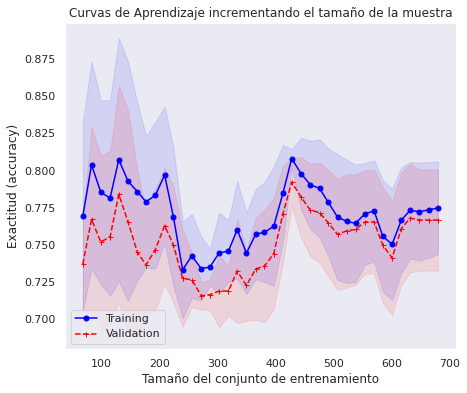

In [167]:
def DTreeCurve(X_entrada2): 
    modeloDT2 = DecisionTreeClassifier(ccp_alpha=ModeloArbolD.best_params_.get('model__ccp_alpha'),
                                     criterion=ModeloArbolD.best_params_.get('model__criterion'),
                                     max_depth=ModeloArbolD.best_params_.get('model__max_depth'),
                                     min_samples_split=ModeloArbolD.best_params_.get('model__min_samples_split')) 
 
    mi_pipe = Pipeline(steps=[("DataPrep", df_ColTransformadas),("DecisionTree2", modeloDT2)])
    mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  
    delta_train_sz = np.linspace(.1, 1, 40) 
    tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,    
                                                        X = X_entrada2,
                                                        y = y_train,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        random_state=10,
                                                        scoring=make_scorer(mi_precision)) 
    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,'Incrementando Profundidad Maxima', 'Profundidad', 'Accuracy' ) 
DTreeCurve(X_train)

5E

In [168]:
modeloCV = RandomForestClassifier() 
mi_pipeCV = Pipeline(steps=[("DataPrep", df_ColTransformadas),("model", modeloCV)])
mi_kfoldCV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

RndForestParam = {'model__ccp_alpha':[0.01, 0.001, .0001, .00001],
              'model__criterion': ['gini', 'entropy'],
              'model__max_depth':[2, 4, 6, 8, 10, 12],
              'model__min_samples_split':[2, 4, 6,8,10],
              'model__class_weight': ['balanced', None]}

RndForestM=  GridSearchCV (estimator =  mi_pipeCV, 
                            param_grid = RndForestParam,
                            scoring = make_scorer(mi_recall),
                            cv = mi_kfoldCV)

RndForestM.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=7),
             estimator=Pipeline(steps=[('DataPrep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Numericas',
                                                                         Pipeline(steps=[('ImpMediana',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scalar',
                                                                                          MinMaxScaler(feature_range=(1,
                                                                                                                      2)))]),
                                                                         ['duration',
                                   

¿Cuál es la utilidad de la métrica “recall”? Incluye tus conclusiones.  
nos ayuda a detectar los falsos negativos, buscando enfocarnos en los positivos predichos entre todos los positivos reales (ejemplo: los verdaderos positivos entre el total de enfermos)

In [170]:
#Imprimimos los mejors valores
print("Best score:", RndForestM.best_score_)
print("Best Param:", RndForestM.best_params_)

Best score: 1.0
Best Param: {'model__ccp_alpha': 0.01, 'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}


5F

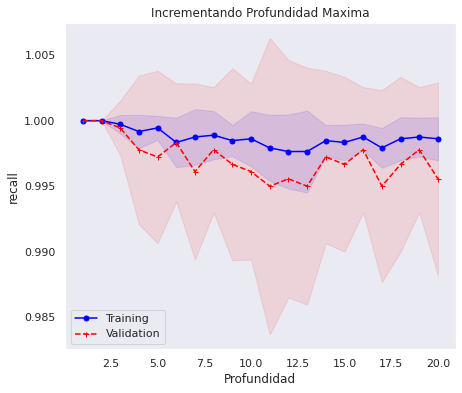

In [173]:
modeloRndF = RandomForestClassifier(ccp_alpha=RndForestM.best_params_.get('model__ccp_alpha'),
                                 criterion=RndForestM.best_params_.get('model__criterion'),
                                 max_depth=10, 
                                 min_samples_split=RndForestM.best_params_.get('model__min_samples_split'))
mi_pipe = Pipeline(steps=[("DataPrep", df_ColTransformadas),("ModeloRandomForest", modeloRndF)])
mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3) 
delta_train_sz = np.linspace(1,20,20, dtype=int)

tr_scores, val_scores = validation_curve(n_jobs = 2, 
                                  estimator = mi_pipe, 
                                  X = X_train,
                                  y = np.ravel(y_train),
                                  param_name = f"ModeloRandomForest__max_depth", 
                                  param_range = delta_train_sz,
                                  cv = mi_kfold, 
                                  scoring = 'recall',)

mi_LearningCurvePlot(delta_train_sz, tr_scores, val_scores,'Incrementando Profundidad Maxima', 'Profundidad', 'recall')

#**Ejercicio-6.**

In [ ]:
EstimadorOptimo = mi_Grid.best_estimator_
predicciones = EstimadorOptimo.predict(X_val)
print("Métrica f1-score: %.3f \n" %(mi_f1score(y_val, predicciones)))


conclusiones
Computacionalmente es mas barato usar regresion lineal, sin embargo sacrificamos un poco el desempeño, tenemos el desempeño mas bajo, pero es el que requiere menos recursos

6B

In [ ]:
EstimadorOptimo = ModeloArbolD.best_estimator_

predicciones = EstimadorOptimo.predict(X_val)
print("Métrica f1-score: %.3f \n" %(mi_f1score(y_val, predicciones)))

tree.plot_tree(EstimadorOptimo.named_steps["model"], filled = True)

Conclusiones
puede ser el punto medio entre regresion lineal y bosques aleatorios, donde el desempeño es mejor que regresion, pero menor que bosque, y su costo computacional es menor que el bosque aleatorio.

6C

In [ ]:
Mejor_bosque = RndForestM.best_estimator_
Bosque_predecido = Mejor_bosque.predict(X_val)

print("Métrica recall: %.3f \n" %(mi_recall(y_val, Bosque_predecido)))

Conclusiones
Computacionalmente muy costoso, pero da el mejor desempeño.

###**Fin de la Actividad de la semana 6.**